# Diamond dataset. 

In [19]:
import pandas as pd 
import numpy as np

diam= pd.read_csv('diamonds.csv')


print(diam.head())

diam.describe() #summary stats 


   ID  carat      cut color clarity  depth   tab  price     x     y     z
0   1   0.23    Ideal     E     SI2   61.5  55.0    326  3.95  3.98  2.43
1   2   0.21  Premium     E     SI1   59.8  61.0    326  3.89  3.84  2.31
2   3   0.23     Good     E     VS1   56.9  65.0    327  4.05  4.07  2.31
3   4   0.29  Premium     I     VS2   62.4  58.0    334  4.20  4.23  2.63
4   5   0.31     Good     J     SI2   63.3  58.0    335  4.34  4.35  2.75


,ID,carat,depth,tab,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# scaling the variables 

In [20]:
#scaling because the range of price is extremly larger than the range of carat 

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

diam.iloc[:,[1,7]]= scalar.fit_transform(diam.iloc[:,[1,7]])

diam


                                             
                                             

,ID,carat,cut,color,clarity,depth,tab,price,x,y,z
0,1,-1.198168,Ideal,E,SI2,61.5,55.0,-0.904095,3.95,3.98,2.43
1,2,-1.240361,Premium,E,SI1,59.8,61.0,-0.904095,3.89,3.84,2.31
2,3,-1.198168,Good,E,VS1,56.9,65.0,-0.903844,4.05,4.07,2.31
3,4,-1.071587,Premium,I,VS2,62.4,58.0,-0.902090,4.20,4.23,2.63
4,5,-1.029394,Good,J,SI2,63.3,58.0,-0.901839,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,-0.164427,Ideal,D,SI1,60.8,57.0,-0.294731,5.75,5.76,3.50
53936,53937,-0.164427,Good,D,SI1,63.1,55.0,-0.294731,5.69,5.75,3.61
53937,53938,-0.206621,Very Good,D,SI1,62.8,60.0,-0.294731,5.66,5.68,3.56
53938,53939,0.130927,Premium,H,SI2,61.0,58.0,-0.294731,6.15,6.12,3.74


# class distribution in the dataset

In [21]:
diam.groupby('cut').size() 


cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

# Univariate plot

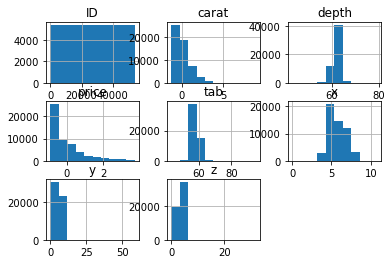

In [22]:
import matplotlib.pyplot as plt
diam.hist()
plt.show() #carat and price are negatively skewed.

# Multivariate plot 

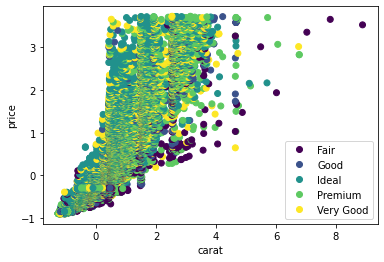

In [23]:
#building a dictionary mapping diamond cut to code

Dict = {'Fair': 0,  
    'Good': 1,
    'Ideal':2,
    'Premium':3,
    'Very Good':4}

#build integer color code 0/1/2
colors = [Dict[item] for item in diam['cut']] #mapping cut categories to integers.


#scatter plot 

scatter = plt.scatter(diam['carat'], diam['price'], c = colors)
plt.xlabel('carat')
plt.ylabel('price')

# add legend
plt.legend(handles= scatter.legend_elements()[0],
  labels = Dict.keys())
plt.show()  

#Note: seems to be no distinct clusters to seperate the groups. 
